<a href="https://colab.research.google.com/github/R0M117/RomNotebook/blob/main/Romero__Analyzing_Historical_Stock_Revenue_Data_and_Building_a_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library For Webscrapping

In [27]:
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import pandas as pd

# Tesla Dataset

## Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [28]:
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.to_csv('tesla_stock_data.csv', index=False)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [29]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [30]:
response  = requests.get(url).text
print(response)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [31]:
soup = BeautifulSoup(response, 'html.parser')
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter ending September 30,

In [32]:
tables = soup.find_all('table')
tesla_revenue = pd.read_html(str(tables))[0]
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
tesla_revenue.dropna(inplace=True)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)
tesla_revenue.tail()

<ipython-input-32-f32c00266da4>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables))[0]


,Date,Revenue
8,2013,2013.0
9,2012,413.0
10,2011,204.0
11,2010,117.0
12,2009,112.0


# Game Stop

## Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [33]:
gamestop_stock = yf.Ticker("GME")
gme_data = gamestop_stock.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.to_csv('gamestop_stock_data.csv', index=False)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [34]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [35]:
data2  = requests.get(url2).text
print(data2)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [36]:
soup2 = BeautifulSoup(data2, 'html.parser')
soup2

<!DOCTYPE html>

<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></script><script async="" src=".

In [40]:
tables = soup2.find_all('table')
gamestop_revenue = pd.read_html(str(tables))[0]
gamestop_revenue.columns = ['Date', 'Revenue']
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
gamestop_revenue.dropna(inplace=True)
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].astype(float)
gamestop_revenue.tail()


<ipython-input-40-b3f8db4d1bd7>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gamestop_revenue = pd.read_html(str(tables))[0]


,Date,Revenue
11,2009,8806.0
12,2008,7094.0
13,2007,5319.0
14,2006,3092.0
15,2005,1843.0


## Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [46]:
import matplotlib.pyplot as plt

def make_graph(stock_df, revenue_df, stock_title):
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(stock_df['Date'], stock_df['Close'], label=f'{stock_title} Stock Price', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2 = ax1.twinx()
    ax2.bar(revenue_df['Date'], revenue_df['Revenue'], alpha=0.6, label=f'{stock_title} Revenue', color='orange')
    ax2.set_ylabel('Revenue', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    plt.title(f'{stock_title} Stock Price and Revenue')
    plt.grid(True)
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()


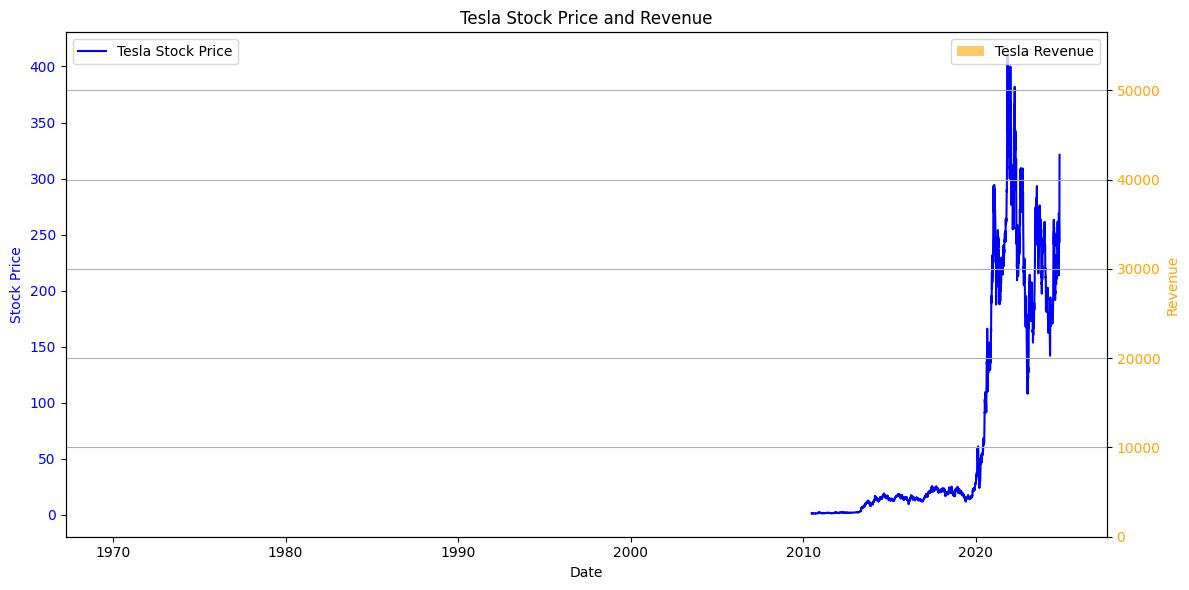

In [45]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


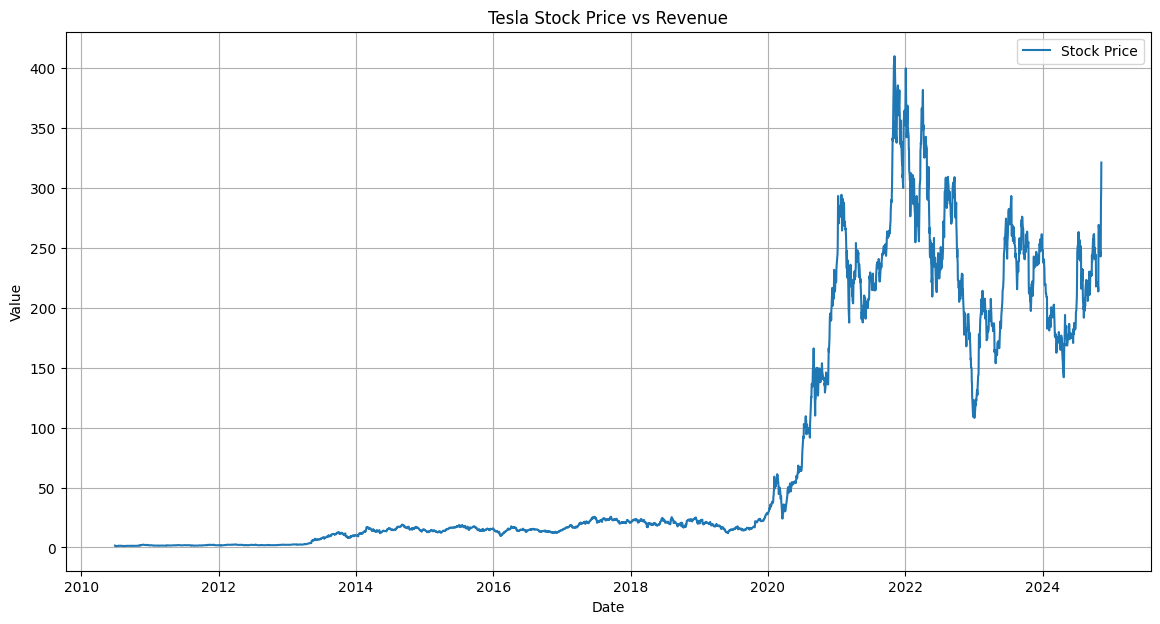

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Stock Price')
plt.title('Tesla Stock Price vs Revenue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


## Question 6 - GameStop Stock and Revenue Dashboard- 2 Points


In [ ]:
import matplotlib.pyplot as plt

def make_graph(stock_df, revenue_df, stock_title):
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(stock_df['Date'], stock_df['Close'], label=f'{stock_title} Stock Price', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2 = ax1.twinx()
    ax2.bar(revenue_df['Date'], revenue_df['Revenue'], alpha=0.6, label=f'{stock_title} Revenue', color='orange')
    ax2.set_ylabel('Revenue', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    plt.title(f'{stock_title} Stock Price and Revenue')
    plt.grid(True)
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()


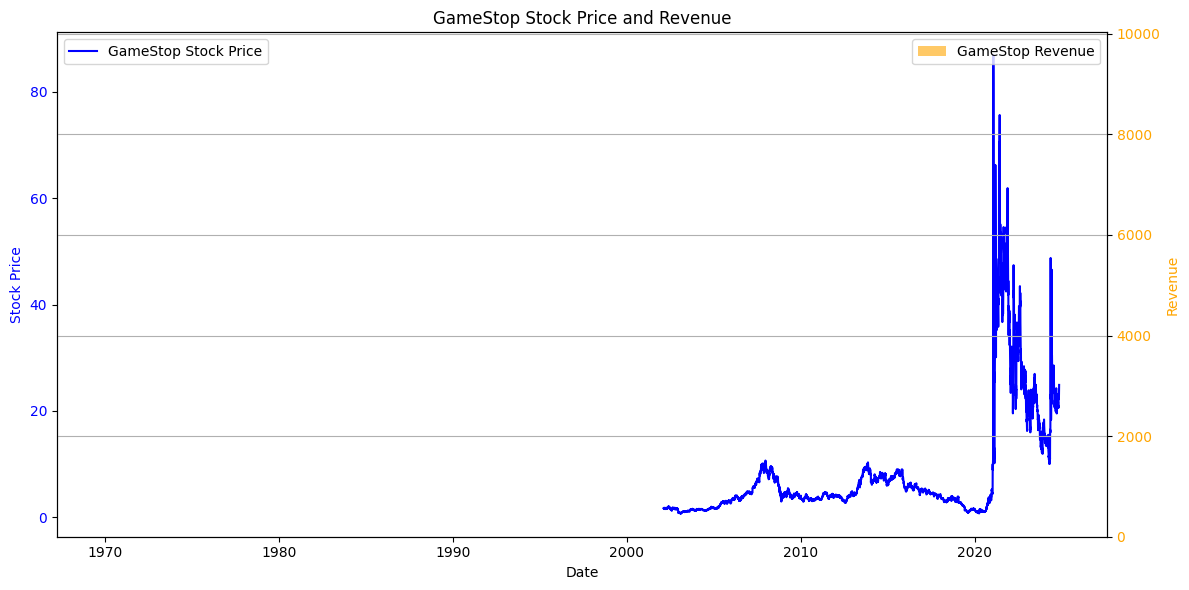

In [47]:
make_graph(gme_data, gamestop_revenue, 'GameStop')


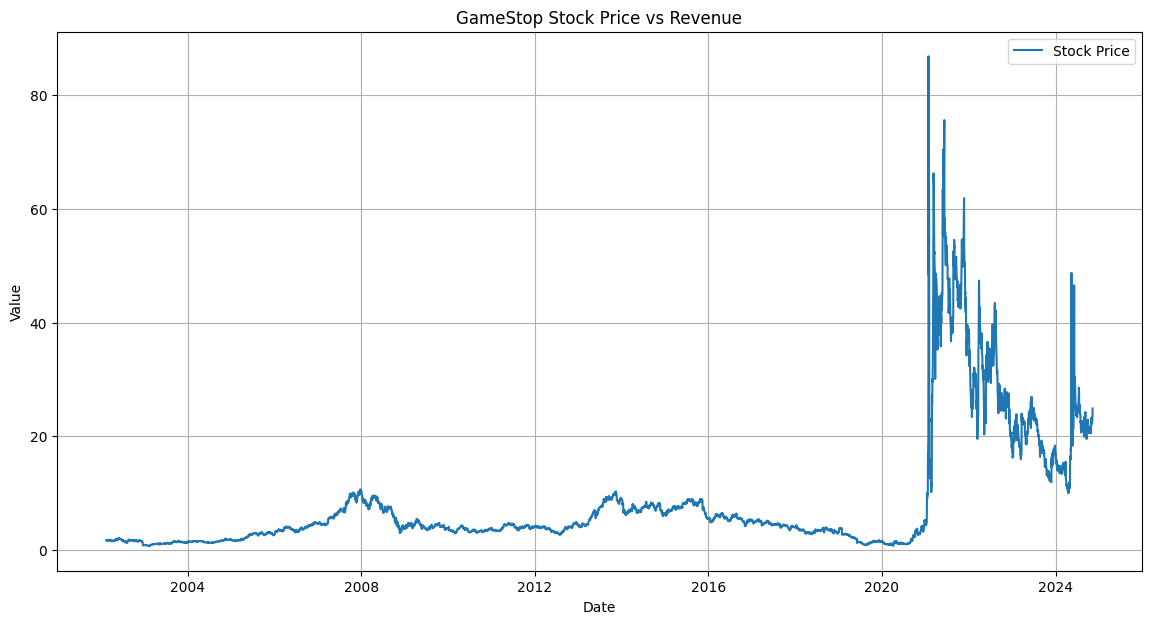

In [39]:
# Plotting GameStop Stock vs Revenue
plt.figure(figsize=(14, 7))
plt.plot(gme_data['Date'], gme_data['Close'], label='Stock Price')
plt.title('GameStop Stock Price vs Revenue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


## Question 7 - Sharing your Assignment Notebook - 2 Points
